### Meta Information of the movielens dataset

> This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

>1. links.csv: Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format: movieId,imdbId,tmdbId

>2. tags.csv: All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format: userId,movieId,tag,timestamp

>3. movies.csv: Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format: movieId,title,genres

>4. ratings.csv: All ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format: userId,movieId,rating,timestamp

>Genres are a pipe-separated list, and are selected from the following:
>
> * Action
> * Adventure
> * Animation
> * Children's
> * Comedy
> * Crime
> * Documentary
> * Drama
> * Fantasy
> * Film-Noir
> * Horror
> * Musical
> * Mystery
> * Romance
> * Sci-Fi
> * Thriller
> * War
> * Western
> * (no genres listed)

### Objective of the Project:

- The movielens project is aimed at creating recommendation system using the datasets containing in the folder for training of   the algorithms, movie ratings prediction and suggesting good and quality films for movie lovers.
- Popularity-Based recommendation
- Content-Based recommendation
- Collaborative Filtering
- To actively update the dataset for new users on the application

### Tech Stack:

1. Pandas for reading the file, dataframe creation, data manipulation, preprocessing, exploratory analysis
2. Numpy for carrying out mathematical operations
3. Matplotlib and Seaborn for data visualization through graphs, plots etc.
4. Streamlitfor UI
5. Scikit-learnfor Labeling and similarity analysis
6. SQLite3 for Database

# Preliminary and Exploratory Analysis and Visualization of the dataset

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

### Ratings dataset

In [41]:
ratings = pd.read_csv("ratings.csv")
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


### Movies dataset

In [42]:
movies = pd.read_csv("movies.csv")
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


### Tags dataset

In [43]:
tags = pd.read_csv('tags.csv')
tags.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
5,2,89774,Tom Hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,Leonardo DiCaprio,1445715051
8,2,106782,Martin Scorsese,1445715056
9,7,48516,way too long,1169687325


### Links dataset

In [44]:
links =  pd.read_csv('links.csv')
links.head(10)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
5,6,113277,949.0
6,7,114319,11860.0
7,8,112302,45325.0
8,9,114576,9091.0
9,10,113189,710.0


### Merging Ratings and Movies dataset into one

In [45]:
ratings.drop('timestamp', inplace=True, axis=1)
tags.drop('timestamp', inplace=True, axis=1)
movie_rats = pd.merge(movies,ratings)
movie_rats.head(10)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0


### Checking if there are any NULL values

In [47]:
movie_rats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.6+ MB


In [48]:
movie_rats.isnull().sum()

movieId    0
title      0
genres     0
userId     0
rating     0
dtype: int64

### Creating a new column Year which specifies the year that movie got released and concatenating it to movie ratings data frame

In [51]:
movie_rats['Year'] = movie_rats['title'].str.extract('.*\((.*)\).*',expand = False)

In [52]:
movie_rats

,movieId,title,genres,userId,rating,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1995
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,2017
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,2017
100833,193585,Flint (2017),Drama,184,3.5,2017
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,2018


### Counting the number of films released in each year

In [59]:
count_per_year = movie_rats['Year'].value_counts()
count_per_year

1995         6144
1994         5296
1999         4536
1996         4509
2000         4268
             ... 
2006–2007       1
1917            1
1919            1
1915            1
1908            1
Name: Year, Length: 107, dtype: int64

### Plotting the number of films released in each genre

<BarContainer object of 19 artists>

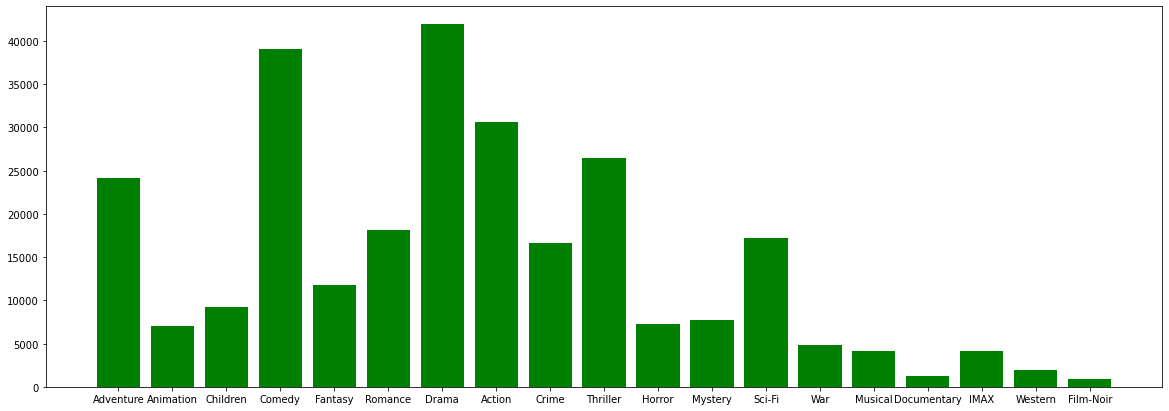

In [56]:
plt.figure(figsize=(20,7))
genre_list = movie_rats['genres'].apply(lambda i : str(i).split("|"))
count={}
for i in genre_list:
    for j in i:
        if(count.get(j,False)):
            count[j]=count[j]+1
        else:
            count[j] = 1      
count.pop("(no genres listed)")
plt.bar(count.keys(),count.values(),color='g')

### Frequency distribution of ratings

(array([ 1370.,  2811.,  1791.,  7551.,  5550., 20047., 13136., 26818.,
         8551., 13211.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

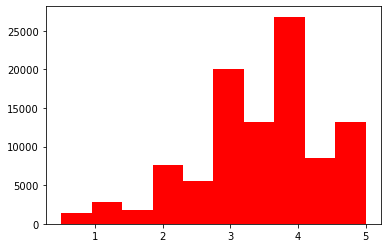

In [57]:
plt.hist(movie_rats.rating, color='r')

### Finding out the number of reviews given by each user and the mean rating given by each

In [62]:
rating_stat = movie_rats.groupby('userId').agg([np.size,np.mean])
rating_stat

movieId                rating          
          size          mean    size      mean
userId                                        
1          232   1854.603448   232.0  4.366379
2           29  70350.275862    29.0  3.948276
3           39   7058.384615    39.0  2.435897
4          216   1982.129630   216.0  3.555556
5           44    343.840909    44.0  3.636364
...        ...           ...     ...       ...
606       1115   9692.197309  1115.0  3.657399
607        187   1860.636364   187.0  3.786096
608        831   4502.605295   831.0  3.134176
609         37    483.162162    37.0  3.270270
610       1302  49590.231183  1302.0  3.688556

[610 rows x 4 columns]

### Finding out the mean rating of each title and number of users that gave review for that title.

In [76]:
mean_ratings = ratings.groupby('movieId').rating.mean()
num_users = ratings.groupby('movieId').userId.count()
mean_ratings_mov_temp = pd.merge(mean_rat, movies, how='inner', on='movieId')
mean_ratings_mov = pd.merge(mean_rat_movie_temp, num_users, how='inner', on='movieId')
mean_ratings_mov.drop(columns='genres', inplace=True)
mean_ratings_mov.rename(columns={'rating':'mean_ratings','userId':'num_users'}, inplace=True)
mean_ratings_mov

,movieId,mean_ratings,title,num_users
0,1,3.920930,Toy Story (1995),215
1,2,3.431818,Jumanji (1995),110
2,3,3.259615,Grumpier Old Men (1995),52
3,4,2.357143,Waiting to Exhale (1995),7
4,5,3.071429,Father of the Bride Part II (1995),49
...,...,...,...,...
9719,193581,4.000000,Black Butler: Book of the Atlantic (2017),1
9720,193583,3.500000,No Game No Life: Zero (2017),1
9721,193585,3.500000,Flint (2017),1
9722,193587,3.500000,Bungo Stray Dogs: Dead Apple (2018),1


In [78]:
mean_ratings_mov_desc = mean_ratings_mov.sort_values(by=['num_users','mean_ratings'],ascending=False) # Sorting values by descending order by users and then rating
mean_ratings_mov_desc

,movieId,mean_ratings,title,num_users
314,356,4.164134,Forrest Gump (1994),329
277,318,4.429022,"Shawshank Redemption, The (1994)",317
257,296,4.197068,Pulp Fiction (1994),307
510,593,4.161290,"Silence of the Lambs, The (1991)",279
1938,2571,4.192446,"Matrix, The (1999)",278
...,...,...,...,...
9401,165645,0.500000,Bad Santa 2 (2016),1
9426,167296,0.500000,Iron Man (1931),1
9540,173307,0.500000,The Gracefield Incident (2015),1
9572,175475,0.500000,The Emoji Movie (2017),1


(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

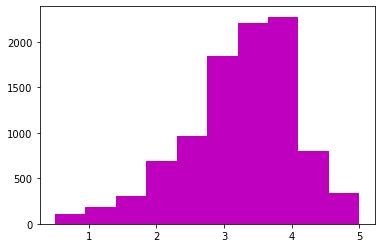

In [79]:
#Frequency distribution of mean ratings for all the movies
plt.hist(mean_ratings_mov.mean_ratings, color='m')

(array([8.946e+03, 4.990e+02, 1.410e+02, 7.200e+01, 2.800e+01, 1.800e+01,
        1.200e+01, 3.000e+00, 2.000e+00, 3.000e+00]),
 array([  1. ,  33.8,  66.6,  99.4, 132.2, 165. , 197.8, 230.6, 263.4,
        296.2, 329. ]),
 <BarContainer object of 10 artists>)

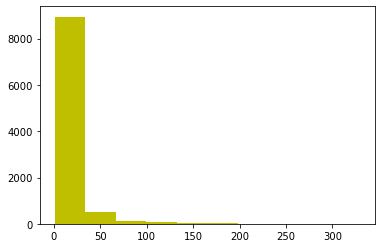

In [81]:
#Frequency distribution of number of users for all the movies
plt.hist(mean_ratings_mov.num_users, color='y')